<a href="https://colab.research.google.com/github/Mitesh512/Deep_Learning/blob/main/PyTorchCNN1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Outline

* Downloading dataset (CIFAR10)
* `Dataloader` in `torch.utils`
* Visualising images
* Single and multiple convolutional layers
* LeNet
* Training LeNet
* Training on GPU
* Simple visualisation
* Exercises

In [1]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## Data loading

In [2]:
import torchvision
import torchvision.transforms as transforms # Transform is used for transforming images format to tensor
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())

Extracting ./data/cifar-10-python.tar.gz to ./data


In [3]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

In [4]:
## Now we will load the data from our trainset which has the data downloaded in our repository
## We will use 4 batches of the images as input
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [5]:
## iter is a function which can be used to iterate over the data
## now we have batch of 4 images 
dataiter = iter(trainloader) # create an object from the trainloader


In [6]:
images, labels = dataiter.next()

print(images.shape)
## we see that we have 4 images 3 is the channel for RGB colors and 32x32 is the pixels in image


torch.Size([4, 3, 32, 32])


In [7]:
## images is like an tensor we can call it for example calling the 0 and 1
print(images[1].shape)
print(labels[1].item())

print(images[0].shape)
print(labels[0].item())

# Both has the size of 3X32x32 as expected and if we see lable one is 9 and other is 5

torch.Size([3, 32, 32])
5
torch.Size([3, 32, 32])
9


## Visualise data

In [8]:
## as we know images is a tensor which has 4 images lets check it
img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [9]:
## to visualise it we have to convert it to numpy

npimg = img.numpy()
print(npimg.shape)

(3, 32, 32)


In [10]:
# to visualise it we have to change the index values so we are changing the index
npimg = np.transpose(npimg, (1, 2, 0))
print(npimg.shape)

(32, 32, 3)


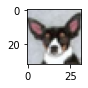

In [11]:
## We can make use of imshow function from the matplotlib to print images
plt.figure(figsize = (1,1))
plt.imshow(npimg)
plt.show()

In [12]:
## Let's create one function which can be used to plot images
def imshow(img):

  """
  take image as in input which is a tensor
  convert tensor to numpy
  change the index
  plot the image with imshow
  """
  npimg = img.numpy()
  plt.imshow(np.transpose(npimg, (1, 2, 0)))
  plt.show()

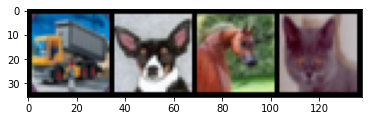

truck         dog         horse         cat


In [13]:
## Let's make use of the function that we just have created
## from torchvision make use of the utils library to make image grids

imshow(torchvision.utils.make_grid(images))
print('         '.join(classes[labels[j]] for j in range(4)))

## Single Convolutional Layer

* Here we wil see how can we create Convolution layer



In [14]:
## let's import torch neural network library which has a number of neural network 
## function which we will be making use of:

import torch.nn as nn

## Module is a basic class for all neural network

class FirstCNN(nn.Module):
  # now let's define the __init__ method
  def __init__(self):
    """
    We can make use of super class init from nn.module and get init params
    for super function we definer the name of the class for whihc we are using 
    super method and params which we are going to make use of in our case self is enough
    
    Now we will create convolution layer for which we can call nn.Conv2d
    create an instance for layer1 
    (3 is the RGB channel
    16 is the number of kernels we will use to create Conv layer
    3 is the size of the kernel
    padding and strides you know)
    """
    super(FirstCNN, self).__init__()
    self.conv1 = nn.Conv2d(3,16,3,padding = (1,1),stride = (1,1))
    
  ## Now let's define forward pass
  def forward(self,x):
    x = self.conv1(x)
    return x

In [15]:
## Lets create an object or instance of our class FirstCNN
## which we then can apply to images to create convolution layer
net = FirstCNN()

In [16]:
print(images.shape)

torch.Size([4, 3, 32, 32])


In [17]:
## After Convolution Opertaion what we shall expect:
## 4 is the batch size, 16 is output channel
## (4,3,32,32) --> (4, 16, 16,16)

## Wo = (Wi - F- 2P)/s +1 == (32 -3 + 2*1)/2 + 1 == 31/2 +1 = 16.5
out = net(images)
out.shape

torch.Size([4, 16, 32, 32])

In [18]:
## parameters gets created for our instance
## weight: 16 is the number kerenl, 3 input channel, 3*3 weight kernel
## bias:  16 are associated biases
## Total number of params = 16*3*3*3+16

for param in net.parameters():
    print(param.shape)

torch.Size([16, 3, 3, 3])
torch.Size([16])


In [19]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(32, 32)


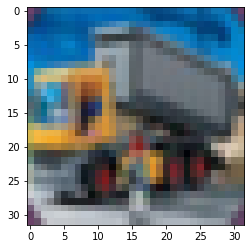

In [20]:
imshow(images[0])

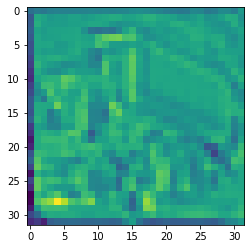

In [21]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

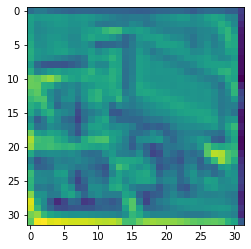

In [22]:
plt.imshow(out[0, 1, :, :].detach().numpy())
plt.show()

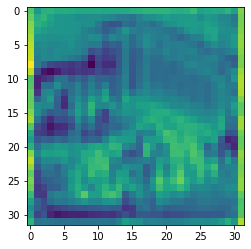

In [23]:
plt.imshow(out[0, 2, :, :].detach().numpy())
plt.show()

## Deep Convolutional Network

In [24]:
## Let's apply 2 Convolution layer
"""
In case of the more than 1 layer we can make use of nn.sequential 
Conv2d(input Channel RGB, Number of kerenls you want, size of kernel)
"""

class FirstCNN_v2(nn.Module):
    def __init__(self): 
        super(FirstCNN_v2, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 8, 3),   # (N, 3, 32, 32) -> (N, 8, 30, 30)
            nn.Conv2d(8, 16, 3)   # (N, 8, 30, 30) -> (N, 16, 28, 28)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [25]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 28, 28])

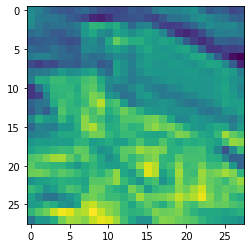

In [26]:
plt.imshow(out[0, 0, :, :].detach().numpy())

In [27]:
## Let's Apply convo layer plus the pooling layer:
## Pooling does not change the number of channels (kernels)


class FirstCNN_v3(nn.Module):
    def __init__(self): 
        super(FirstCNN_v3, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(3, 6, 5),          # (N, 3, 32, 32) -> (N, 6, 28, 28)
            nn.AvgPool2d(2, stride=2),   # (N, 6, 28, 28) -> (N, 6, 14, 14)
            nn.Conv2d(6, 16, 5),         # (N, 6, 14, 14) -> (N, 16, 10, 10)
            nn.AvgPool2d(2, stride=2)    # (N, 16, 10, 10) -> (N, 16, 5, 5)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [28]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 5, 5])

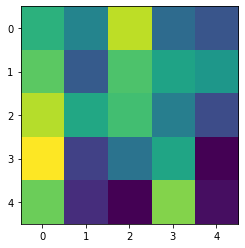

In [29]:
plt.imshow(out[0, 0, :, :].detach().numpy())

## LeNet

It is a simple CNN architecture, was proposed some 20 years ago but it's good to understand basics with this model

In [46]:
## Let's create the class for LeNet

class LeNet(nn.Module):
  def __init__(self):
    super(LeNet, self).__init__()
    self.cnn_model = nn.Sequential(
        nn.Conv2d(3,6,5),           ## (N,3,32,32) --> (N,6, 28,28)
        nn.Tanh(),
        nn.AvgPool2d(2, stride = 2), ## (N,6,28,28) --> (N,6,14,14)
        nn.Conv2d(6,16,5),          ## (N,6,14,14) --> (N,16,10,10)
        nn.Tanh(),
        nn.AvgPool2d(2, stride = 2) ## (N,16,10,10) --> (N,16,5,5)
        )
    """
    Now we have defined the convolution structure
    Next we shall define the fully connected Deep Neural layer 
    """
    self.fc_model = nn.Sequential(
        nn.Linear(400,120),   ## (N,400) --> (N,120)
        nn.Tanh(),
        nn.Linear(120,84),    ## (N,120) --> (N,84)
        nn.Tanh(),
        nn.Linear(84,10)      ## we are just giving output through linear softmax is not required
        )
    
    """
    The Architecture is ready next task is to build the forward pass:
    before passing it to fully connected Deep layer we must flatten the input
    """

  def forward(self,x):
    print('Shape of X before transformation',x.shape)
    x= self.cnn_model(x)                ## Run through CNN architecture
    print('Shape after Convolution :', x.shape)
    print('Checking output of x.size(0) x.size() & ',x.size(0), x.size())
    x = x.view(x.size(0),-1)
    print('after flattening',x.shape)
    x = self.fc_model(x)                ## Run Through Fully connected architecture
    print('Shape after Fully Connected layer', x.shape)
    return x




#     def forward(self, x):
#         print(x.shape)
#         x = self.cnn_model(x)
#         print(x.shape)
#         x = x.view(x.size(0), -1)
#         print(x.shape)
#         x = self.fc_model(x)
#         print(x.shape)
#         return x



# class LeNet(nn.Module):
#     def __init__(self): 
#         super(LeNet, self).__init__()
#         self.cnn_model = nn.Sequential(
#             nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
#             nn.Tanh(),
#             nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
#             nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
#             nn.Tanh(),
#             nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
#         )
#         self.fc_model = nn.Sequential(
#             nn.Linear(400,120),         # (N, 400) -> (N, 120)
#             nn.Tanh(),
#             nn.Linear(120,84),          # (N, 120) -> (N, 84)
#             nn.Tanh(),
#             nn.Linear(84,10)            # (N, 84)  -> (N, 10)
#         )
        
#     def forward(self, x):
#         print(x.shape)
#         x = self.cnn_model(x)
#         print(x.shape)
#         x = x.view(x.size(0), -1)
#         print(x.shape)
#         x = self.fc_model(x)
#         print(x.shape)
#         return x

In [47]:
net = LeNet()
out = net(images)

Shape of X before transformation torch.Size([4, 3, 32, 32])
Shape after Convolution : torch.Size([4, 16, 5, 5])
Checking output of x.size(0) x.size() &  4 torch.Size([4, 16, 5, 5])
after flattening torch.Size([4, 400])
Shape after Fully Connected layer torch.Size([4, 10])


In [48]:
print(out)

tensor([[-7.1004e-06, -1.5246e-02, -7.7983e-02,  5.2698e-02, -1.2521e-01,
         -9.8435e-02, -4.4312e-02,  2.3783e-02,  1.1500e-01, -1.7459e-01],
        [-4.7119e-03, -3.6858e-03, -5.6974e-02,  7.2785e-02, -1.4930e-01,
         -7.6985e-02, -4.7802e-02,  2.3215e-02,  1.3204e-01, -1.6584e-01],
        [ 8.5912e-03, -1.6718e-03, -7.5052e-02,  6.1601e-02, -1.3386e-01,
         -7.6184e-02, -2.7570e-02,  1.3121e-02,  1.1747e-01, -1.8214e-01],
        [ 1.4359e-02, -9.3197e-03, -6.8537e-02,  5.6147e-02, -1.3692e-01,
         -8.5977e-02, -3.2727e-02,  1.5740e-02,  1.2567e-01, -1.6676e-01]],
       grad_fn=<AddmmBackward>)


In [49]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([8, 8, 8, 8])


## Training LeNet

In [50]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 32, 32) -> (N,  6, 28, 28)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 28, 28) -> (N,  6, 14, 14)
            nn.Conv2d(6, 16, 5),        # (N, 6, 14, 14) -> (N, 16, 10, 10)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 10, 10) -> (N, 16, 5, 5)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(400,120),         # (N, 400) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [51]:
## Let's Run this on full dataset 
"""
define a batch size (Generally in power of 2)
We will make use of torchvision & torch.utils library
Get the data and then divide the dataset into batches with shuffle as True for train

"""
batch_size = 128
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [58]:
## Define evaluation function
## For any loaded data we can calculate accuracy
"""
*_,b it will consider only the last value in array
_ undrscore is also used for ignoring the values 
"""
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        *_, pred = torch.max(outputs.data, 1) # pred will be max in the Linear o/p
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [59]:
net = LeNet()

In [61]:
## Let's define Back Propagation, we will use adam optimizer
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/16, Test acc: 38.39, Train acc: 38.13
Epoch: 1/16, Test acc: 43.67, Train acc: 43.74
Epoch: 2/16, Test acc: 46.30, Train acc: 46.62
Epoch: 3/16, Test acc: 49.37, Train acc: 50.37
Epoch: 4/16, Test acc: 50.15, Train acc: 51.86
Epoch: 5/16, Test acc: 52.14, Train acc: 54.40
Epoch: 6/16, Test acc: 52.72, Train acc: 56.28
Epoch: 7/16, Test acc: 53.53, Train acc: 57.73
Epoch: 8/16, Test acc: 54.44, Train acc: 58.82
Epoch: 9/16, Test acc: 54.61, Train acc: 59.97
Epoch: 10/16, Test acc: 55.91, Train acc: 61.58
Epoch: 11/16, Test acc: 55.41, Train acc: 61.88
Epoch: 12/16, Test acc: 55.28, Train acc: 63.09
Epoch: 13/16, Test acc: 56.54, Train acc: 64.56
Epoch: 14/16, Test acc: 56.37, Train acc: 64.63
Epoch: 15/16, Test acc: 56.54, Train acc: 66.50


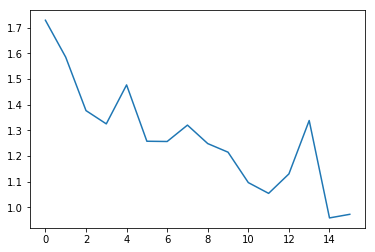

CPU times: user 7min 39s, sys: 9.16 s, total: 7min 48s
Wall time: 7min 49s


In [ ]:
#Define epochs:

%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

## Move to GPU

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [ ]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [ ]:
%%time
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
    print('Epoch: %d/%d' % (epoch, max_epochs))

Epoch: 0/16
Epoch: 1/16
Epoch: 2/16
Epoch: 3/16
Epoch: 4/16
Epoch: 5/16
Epoch: 6/16
Epoch: 7/16
Epoch: 8/16
Epoch: 9/16
Epoch: 10/16
Epoch: 11/16
Epoch: 12/16
Epoch: 13/16
Epoch: 14/16
Epoch: 15/16
CPU times: user 1min 37s, sys: 1.97 s, total: 1min 38s
Wall time: 1min 39s


In [ ]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 55.23, Train acc: 65.33


## Basic Visualisation

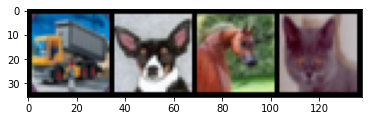

In [62]:
imshow(torchvision.utils.make_grid(images))

In [ ]:
net = net.to('cpu')

In [63]:
out = net(images)
print(out.shape)

torch.Size([4, 10])


In [64]:
out = net.cnn_model[0](images)
out.shape

torch.Size([4, 6, 28, 28])

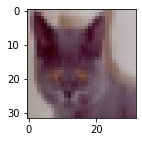

In [65]:
image_id = 3
plt.figure(figsize = (2,2))
imshow(images[image_id,])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


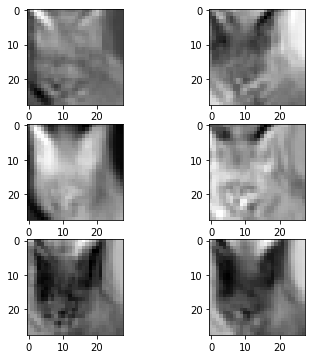

In [67]:
plt.figure(figsize = (6,6))
plt.subplot(321)
for i in range(6):
    ax1 = plt.subplot(3, 2, i+1)
    plt.imshow(out[image_id, i, :, :].detach().numpy(), cmap="binary")
plt.show()